In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 데이터를 불러오기
df = pd.read_csv("./insurance.csv")

In [2]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# 중복확인
df.duplicated().sum()

1

In [4]:
# 중복제거
df = df.drop_duplicates()

In [5]:
df.duplicated().sum()

0

In [6]:
# null값 확인
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [7]:
# 열 이름 변경
df = df.rename(columns={"sex": "gender", "charges": "insurance fee"})

df

,age,gender,bmi,children,smoker,region,insurance fee
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
# "sex" 열의 값을 변경
df["gender"] = df["gender"].replace({"female": 1, "male": 0})

df

,age,gender,bmi,children,smoker,region,insurance fee
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


이상치 list : [49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]


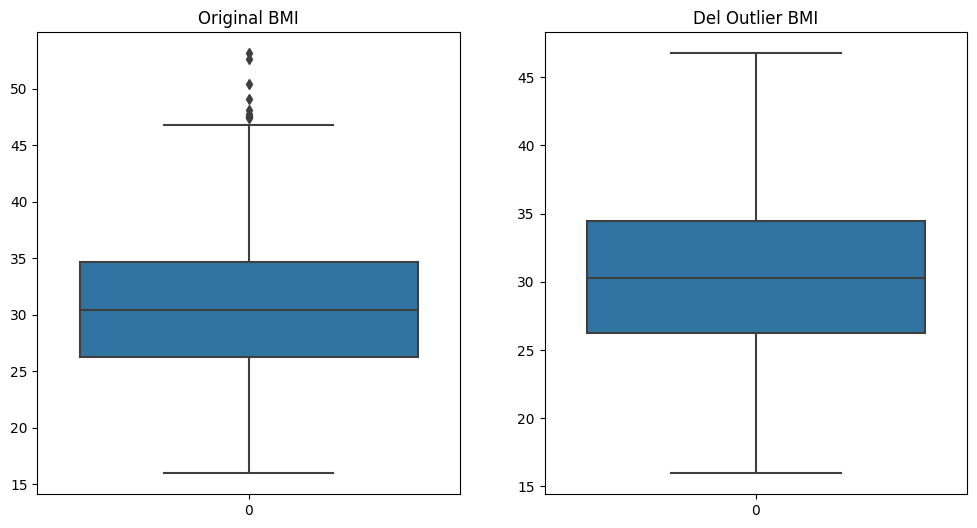

In [9]:
plt.figure(figsize=(12, 6))  
plt.subplot(1, 2, 1)  
boxplot = sns.boxplot(df["bmi"])
plt.title("Original BMI")

# 이상치 제거
outliers = []
for line in boxplot.get_lines():
    if len(line.get_xdata()) > 2:
        outliers.extend(line.get_ydata())

print(f"이상치 list : {outliers}")

df = df[~df['bmi'].isin(outliers)]
                        
plt.subplot(1, 2, 2)
plt.title("Del Outlier BMI")
sns.boxplot(df["bmi"])

plt.show()  # 그래프 출력

In [10]:
# Min-Max 스케일러 생성
scaler = MinMaxScaler()
df[['bmi', 'age']] = scaler.fit_transform(df[['bmi', 'age']])

df

C:\Users\sh\AppData\Local\Temp\ipykernel_19992\1871460246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['bmi', 'age']] = scaler.fit_transform(df[['bmi', 'age']])


,age,gender,bmi,children,smoker,region,insurance fee
0,0.021739,1,0.387788,0,yes,southwest,16884.92400
1,0.000000,0,0.578435,1,no,southeast,1725.55230
2,0.217391,0,0.553426,3,no,southeast,4449.46200
3,0.326087,0,0.219065,0,no,northwest,21984.47061
4,0.304348,0,0.419617,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,0,0.487496,3,no,northwest,10600.54830
1334,0.000000,1,0.518350,0,no,northeast,2205.98080
1335,0.000000,1,0.678467,0,no,southeast,1629.83350
1336,0.065217,1,0.319584,0,no,southwest,2007.94500


In [11]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix['insurance fee'])

# 상관관계가 적은 children, gender drop
df.drop(columns=['children','gender'], inplace=True) 

df = df.reset_index(drop=True)
df

age              0.301317
gender          -0.064161
bmi              0.193270
children         0.069125
insurance fee    1.000000
Name: insurance fee, dtype: float64


C:\Users\sh\AppData\Local\Temp\ipykernel_19992\1848486435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['children','gender'], inplace=True)


,age,bmi,smoker,region,insurance fee
0,0.021739,0.387788,yes,southwest,16884.92400
1,0.000000,0.578435,no,southeast,1725.55230
2,0.217391,0.553426,no,southeast,4449.46200
3,0.326087,0.219065,no,northwest,21984.47061
4,0.304348,0.419617,no,northwest,3866.85520
...,...,...,...,...,...
1323,0.695652,0.487496,no,northwest,10600.54830
1324,0.000000,0.518350,no,northeast,2205.98080
1325,0.000000,0.678467,no,southeast,1629.83350
1326,0.065217,0.319584,no,southwest,2007.94500
